# <font color = teal>Microsoft Engage 2022

## <font color = purple>Project : Data Analysis

### <font color = violet>By - Aditi Joshi

<b>Aim</b> : Develop an application to demonstrate how the Automotive Industry could harness data to take informed decisions.

<b>Experiment</b> : Use the given sample dataset to suggest a good car model(with specifications) taking budget as an input from the user

The Notebook focuses on determining the relationship between various automotive parameters and attempting to gather useful information and draw conclusions.

In [1]:
import pandas as pd
import numpy as np
from termcolor import colored
import warnings
warnings.filterwarnings("ignore")
from pprint import pprint

In [2]:
automobile = pd.read_csv("clean_dataset.csv", index_col=0)

automobile.head()

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Emission_Norm,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,...,Ventilation_System,Engine_Immobilizer,ABS_(Anti-lock_Braking_System),Door_Ajar_Warning,EBD_(Electronic_Brake-force_Distribution),Fasten_Seat_Belt_Warning,Parking_Assistance,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Kerb_Weight
0,Tata,Nano Genx,Xt,292667,624.0,2,BS IV,Injection,24.0,Petrol,...,Manual Air conditioning with cooling and heating,No,No,No,No,No,No,No,Manual Adjustment,660.0
1,Tata,Nano Genx,Xe,236447,624.0,2,BS IV,Injection,24.0,Petrol,...,No,No,No,No,No,No,No,No,Manual Adjustment,725.0
2,Tata,Nano Genx,Emax Xm,296661,624.0,2,BS IV,Injection,15.0,CNG,...,Air Conditioning with cooling only,No,No,No,No,No,No,No,Manual Adjustment,710.0
3,Tata,Nano Genx,Xta,334768,624.0,2,BS IV,Injection,24.0,Petrol,...,Manual Air conditioning with cooling and heating,No,No,No,No,No,No,No,Manual Adjustment,725.0
4,Tata,Nano Genx,Xm,272223,624.0,2,BS IV,Injection,24.0,Petrol,...,Air Conditioning with cooling only,No,No,No,No,No,No,No,Manual Adjustment,725.0


In [3]:
columns = list(automobile.columns)

In [4]:
automobile.dtypes

Make                                          object
Model                                         object
Variant                                       object
Ex-Showroom_Price                              int64
Displacement                                 float64
Cylinders                                      int64
Emission_Norm                                 object
Fuel_System                                   object
Fuel_Tank_Capacity                           float64
Fuel_Type                                     object
Height                                       float64
Length                                       float64
Width                                        float64
Body_Type                                     object
ARAI_Certified_Mileage                       float64
Gears                                         object
Ground_Clearance                             float64
Power_Steering                                object
Power_Windows                                 

In [5]:
automobile.describe()

,Ex-Showroom_Price,Displacement,Cylinders,Fuel_Tank_Capacity,Height,Length,Width,ARAI_Certified_Mileage,Ground_Clearance,Power,Seating_Capacity,Boot_Space,Kerb_Weight
count,1.276000e+03,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000
mean,4.596538e+06,1858.640191,4.361285,51.966818,1591.038280,4296.883730,1788.392326,19.902117,176.300157,158.010851,5.268809,390.319864,1273.791357
std,1.214735e+07,1058.138838,1.619598,16.020098,157.866868,476.612977,150.229215,40.879284,29.752265,126.489577,1.142683,160.334301,448.759943
min,2.364470e+05,72.000000,2.000000,15.000000,1.845000,4.640000,1.845000,3.400000,100.000000,47.000000,2.000000,20.000000,660.000000
25%,7.438760e+05,1198.000000,4.000000,41.000000,1495.000000,3991.750000,1698.000000,16.000000,165.000000,82.824000,5.000000,295.000000,990.467868
50%,1.060064e+06,1497.000000,4.000000,49.300862,1557.000000,4331.000000,1771.730286,19.010000,165.000000,108.460000,5.000000,390.319864,1065.000000
75%,2.979828e+06,1998.000000,4.000000,60.000000,1666.000000,4620.000000,1850.500000,21.040000,188.000000,174.522000,5.000000,460.000000,1562.000000
max,2.121554e+08,7993.000000,16.000000,105.000000,2670.000000,6092.000000,2226.000000,1449.000000,498.000000,789.000000,16.000000,1761.000000,2962.000000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
title_color = "orange"
plot_color = "orchid"
plot_alt_color = "coral"
plot_color_secondary = "deepskyblue"
y_title_margin = 1.0

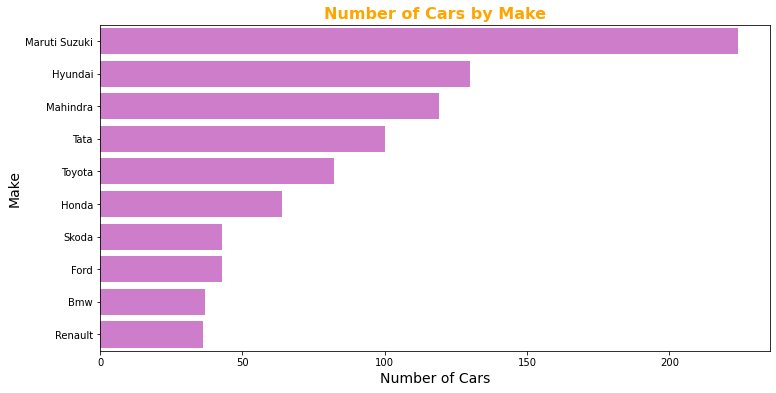

In [10]:
fig, ax = plt.subplots(figsize=(12,6), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Number of Cars by Make", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

top_10_makers = automobile["Make"].value_counts()[:10].to_frame()
symbol_dist = sns.barplot(top_10_makers["Make"],top_10_makers.index, color=plot_color, ax=ax)
symbol_dist.set_ylabel('Make',fontsize=14 )
symbol_dist.set_xlabel('Number of Cars',fontsize=14)

fig.savefig('Images/numcars_by_make.png',dpi=fig.dpi,bbox_inches='tight')

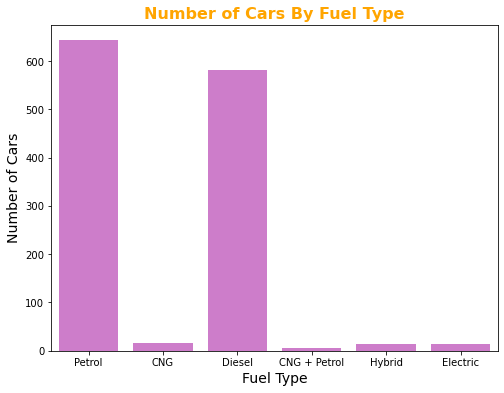

In [12]:
fig, ax = plt.subplots(figsize=(8,6), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Number of Cars By Fuel Type", y = y_title_margin, color=title_color, 
             fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

symbol_dist = sns.countplot(automobile["Fuel_Type"], color=plot_color, ax=ax)
symbol_dist.set_ylabel('Number of Cars',fontsize=14 )
symbol_dist.set_xlabel('Fuel Type',fontsize=14)

fig.savefig('Images/numcars_by_fueltype.png',dpi=fig.dpi,bbox_inches='tight')

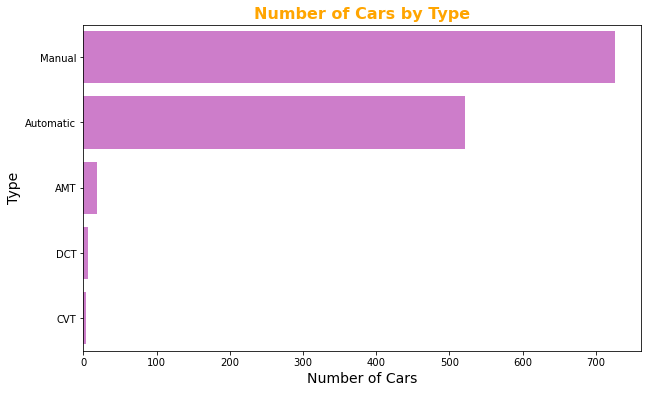

In [13]:
fig, ax = plt.subplots(figsize=(10,6), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Number of Cars by Type", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

top_10_makers = automobile["Type"].value_counts()[:10].to_frame()
symbol_dist = sns.barplot(top_10_makers["Type"],top_10_makers.index, color=plot_color, ax=ax)
symbol_dist.set_ylabel('Type',fontsize=14 )
symbol_dist.set_xlabel('Number of Cars',fontsize=14)

fig.savefig('Images/numcars_by_type.png',dpi=fig.dpi,bbox_inches='tight')

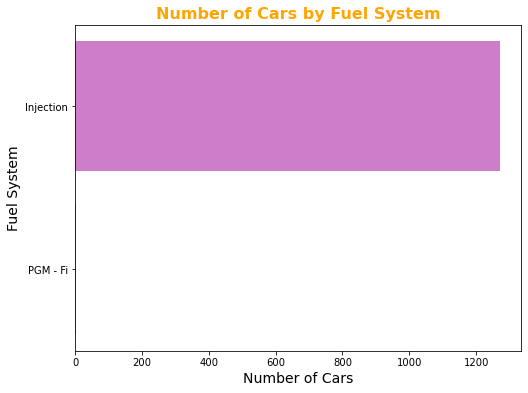

In [14]:
fig, ax = plt.subplots(figsize=(8,6), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Number of Cars by Fuel System", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

top_10_makers = automobile["Fuel_System"].value_counts()[:10].to_frame()
symbol_dist = sns.barplot(top_10_makers["Fuel_System"],top_10_makers.index, color=plot_color, ax=ax)
symbol_dist.set_ylabel('Fuel System',fontsize=14 )
symbol_dist.set_xlabel('Number of Cars',fontsize=14)

fig.savefig('Images/numcars_by_fuelsystem.png',dpi=fig.dpi,bbox_inches='tight')

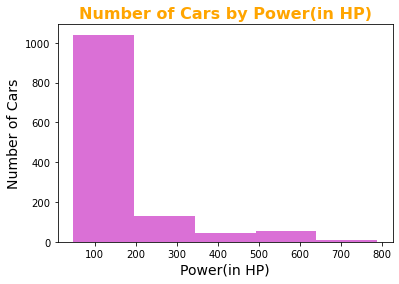

In [15]:
fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Number of Cars by Power(in HP)", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

symbol_dist = sns.distplot(automobile['Power'], bins=5, kde = False, ax=ax, 
                           hist_kws={"linewidth": 1, "alpha": 1, "color": plot_color})
symbol_dist.set_ylabel('Number of Cars',fontsize=14 )
symbol_dist.set_xlabel('Power(in HP)',fontsize=14)

fig.savefig('Images/numcars_by_power.png',dpi=fig.dpi,bbox_inches='tight')

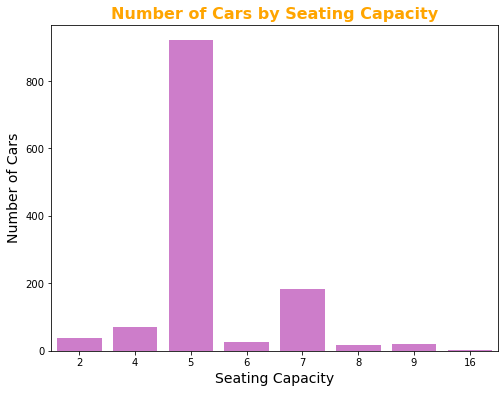

In [16]:
fig, ax = plt.subplots(figsize=(8,6), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Number of Cars by Seating Capacity", y = y_title_margin, color=title_color, 
             fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

symbol_dist = sns.countplot(automobile["Seating_Capacity"], color=plot_color, ax=ax)
symbol_dist.set_ylabel('Number of Cars',fontsize=14 )
symbol_dist.set_xlabel('Seating Capacity',fontsize=14)

fig.savefig('Images/numcers_by_seatingcapacity.png',dpi=fig.dpi,bbox_inches='tight')

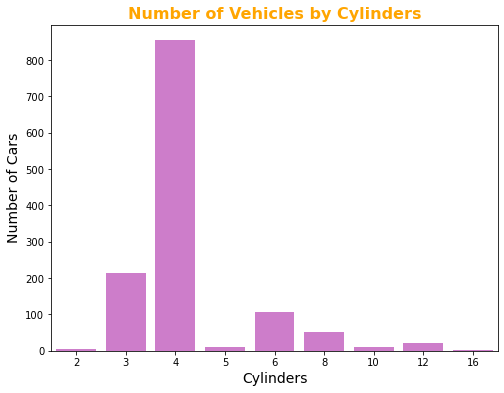

In [17]:
fig, ax = plt.subplots(figsize=(8,6), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Number of Vehicles by Cylinders", y = y_title_margin, color=title_color, 
             fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

symbol_dist = sns.countplot(automobile["Cylinders"], color=plot_color, ax=ax)
symbol_dist.set_ylabel('Number of Cars',fontsize=14 )
symbol_dist.set_xlabel('Cylinders',fontsize=14)

fig.savefig('Images/numcars_by_cylinders.png',dpi=fig.dpi,bbox_inches='tight')

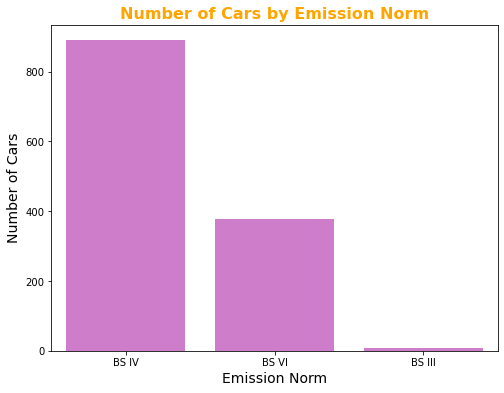

In [19]:
fig, ax = plt.subplots(figsize=(8,6), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Number of Cars by Emission Norm", y = y_title_margin, color=title_color, 
             fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

symbol_dist = sns.countplot(automobile["Emission_Norm"], color=plot_color, ax=ax)
symbol_dist.set_ylabel('Number of Cars',fontsize=14 )
symbol_dist.set_xlabel('Emission Norm',fontsize=14)

fig.savefig('Images/numcars_by_emissionnorm.png',dpi=fig.dpi,bbox_inches='tight')

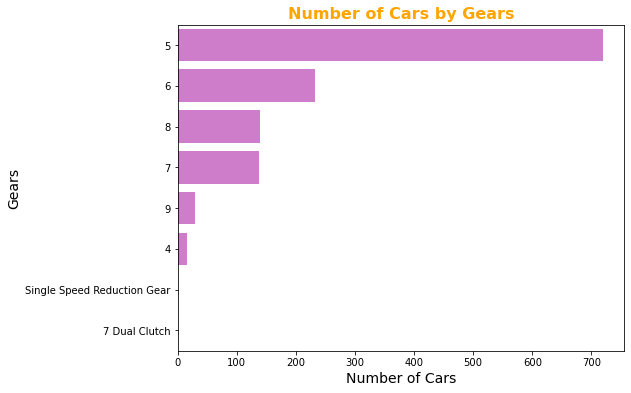

In [20]:
fig, ax = plt.subplots(figsize=(8,6), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Number of Cars by Gears", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

top_10_makers = automobile["Gears"].value_counts()[:10].to_frame()
symbol_dist = sns.barplot(top_10_makers["Gears"],top_10_makers.index, color=plot_color, ax=ax)
symbol_dist.set_ylabel('Gears',fontsize=14 )
symbol_dist.set_xlabel('Number of Cars',fontsize=14)

fig.savefig('Images/numcars_by_gears.png',dpi=fig.dpi,bbox_inches='tight')

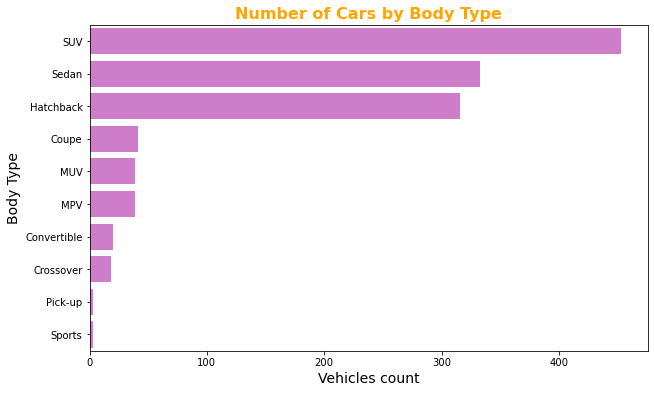

In [21]:
fig, ax = plt.subplots(figsize=(10,6), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Number of Cars by Body Type", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

top_10_makers = automobile["Body_Type"].value_counts()[:10].to_frame()
symbol_dist = sns.barplot(top_10_makers["Body_Type"],top_10_makers.index, color=plot_color, ax=ax)
symbol_dist.set_ylabel('Body Type',fontsize=14 )
symbol_dist.set_xlabel('Vehicles count',fontsize=14)

fig.savefig('Images/body_type.png',dpi=fig.dpi,bbox_inches='tight')

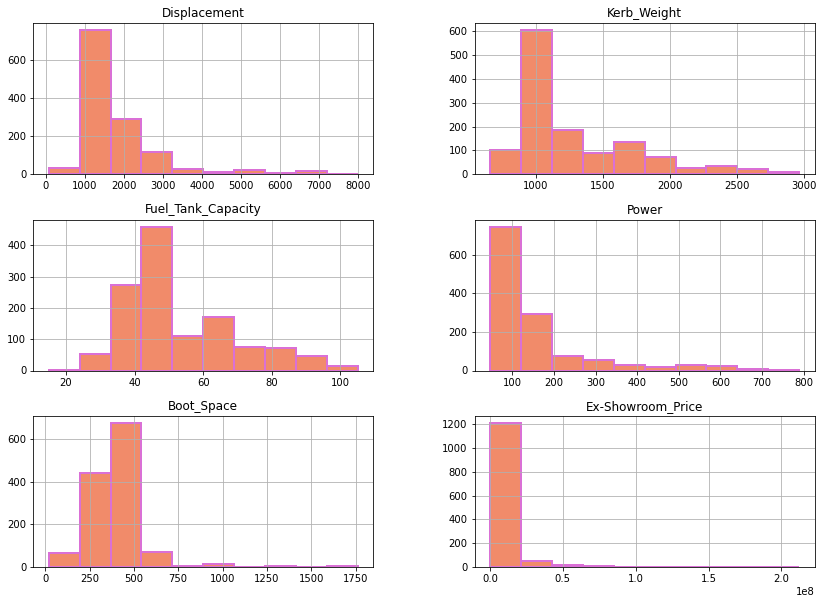

In [22]:
fig, ax = plt.subplots(figsize=(14,10), ncols=1, nrows=1)
fig.patch.set_alpha(.7)

automobile[['Displacement','Kerb_Weight','Fuel_Tank_Capacity','Power', 'Boot_Space', 
            'Ex-Showroom_Price']].hist(color='#F18B6A', ax=ax, edgecolor=plot_color, linewidth=2)
plt.show()

fig.savefig('Images/car_features.png',dpi=fig.dpi,bbox_inches='tight')

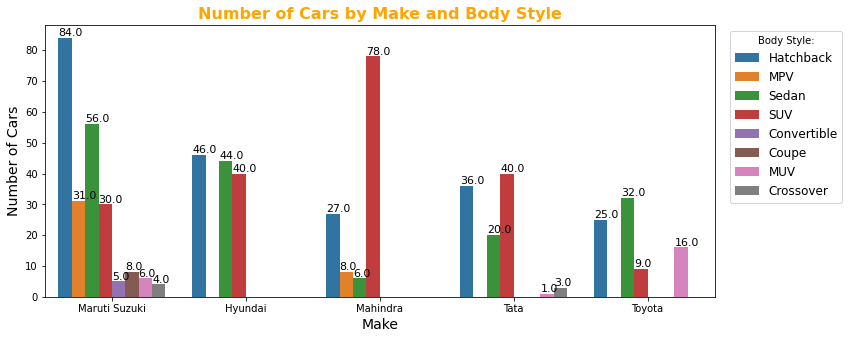

In [23]:
top_5_makers = automobile["Make"].value_counts()[:5].to_frame().reset_index()
maker_cols = top_5_makers["index"].tolist()

fig, ax = plt.subplots(figsize=(12,5), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)

ax.set_title("Number of Cars by Make and Body Style", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
symbol_dist = sns.countplot(data=automobile[automobile['Make'].isin(maker_cols)], order=maker_cols, 
                            x="Make", hue="Body_Type", ax=ax)

symbol_dist.set_ylabel('Number of Cars', fontsize=14 )
symbol_dist.set_xlabel('Make', fontsize=14)
symbol_dist.legend(title="Body Style:", loc="upper right", fontsize="12", bbox_to_anchor=(1.2,1))
fig.savefig('Images/numcars_by_makebodystyle.png',dpi=fig.dpi,bbox_inches='tight')

for p in symbol_dist.patches:
    symbol_dist.annotate(format(p.get_height()), (p.get_x(), p.get_height()), fontsize=11, ha='left', va='bottom')

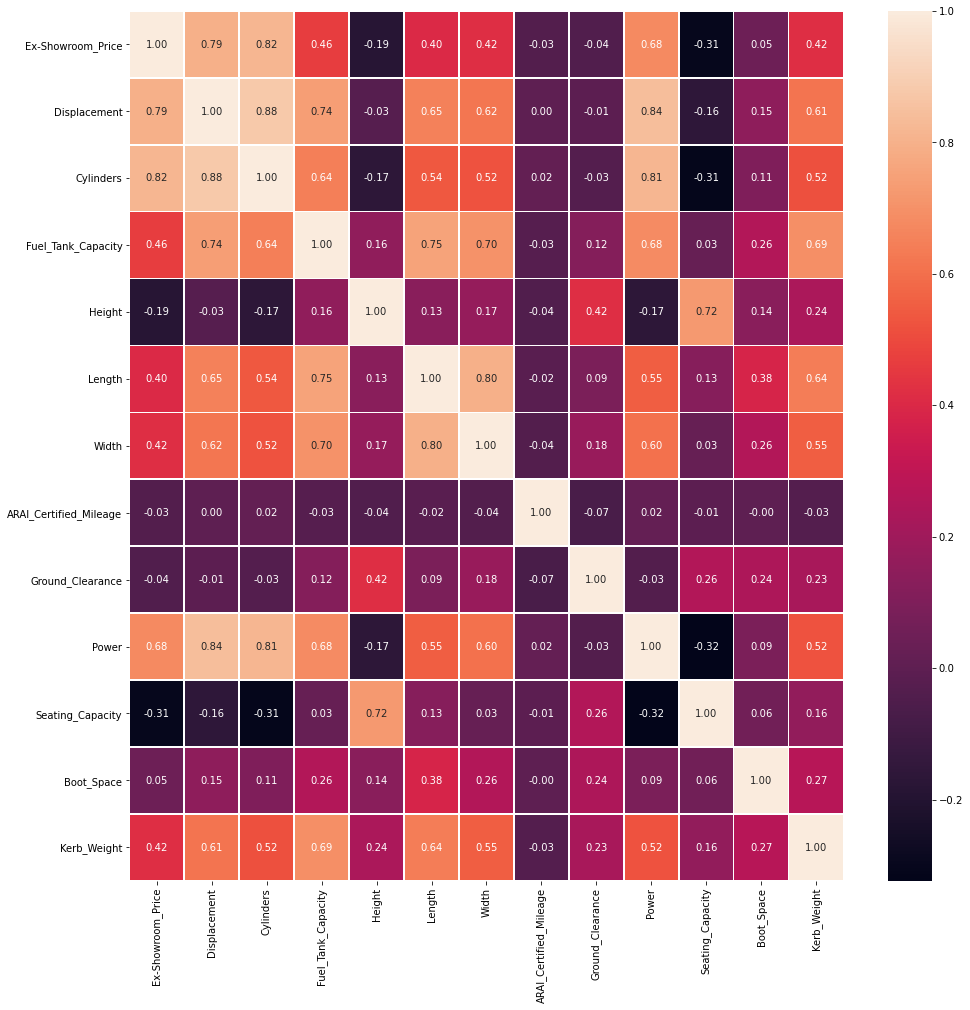

In [28]:
corr = automobile.corr()
fig, ax = plt.subplots(figsize=(16,16))  
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.6)
plt.savefig('Images/cars_corr_matrix.png', bbox_inches='tight')

In [29]:
def DrawPairPlot(dframe, kind, diag_kind, filename):
    '''
    Draw pair plot based on the given parameters..
    '''
    sns.pairplot(dframe, kind = kind, diag_kind = diag_kind, diag_kws=dict(color=plot_color, linewidth=1), 
                 plot_kws=dict(color=plot_color))
    plt.savefig(filename, bbox_inches='tight')
    
def DrawScatterPlot(dframe, xcol, ycol, size, plotColor, title, xlabel, ylabel, filename):
    '''
    Draw scatter plot.
    '''
    fig, ax = plt.subplots(figsize=size, ncols=1, nrows=1) # get the figure and axes objects 

    fig.patch.set_alpha(1)
    ax.set_title(title, y = y_title_margin, fontsize=16)
    ax.patch.set_alpha(1)
    
    ax = sns.scatterplot(x=xcol, y=ycol, data=dframe, color=plotColor)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    
    fig.savefig(filename, dpi=fig.dpi, bbox_inches='tight')

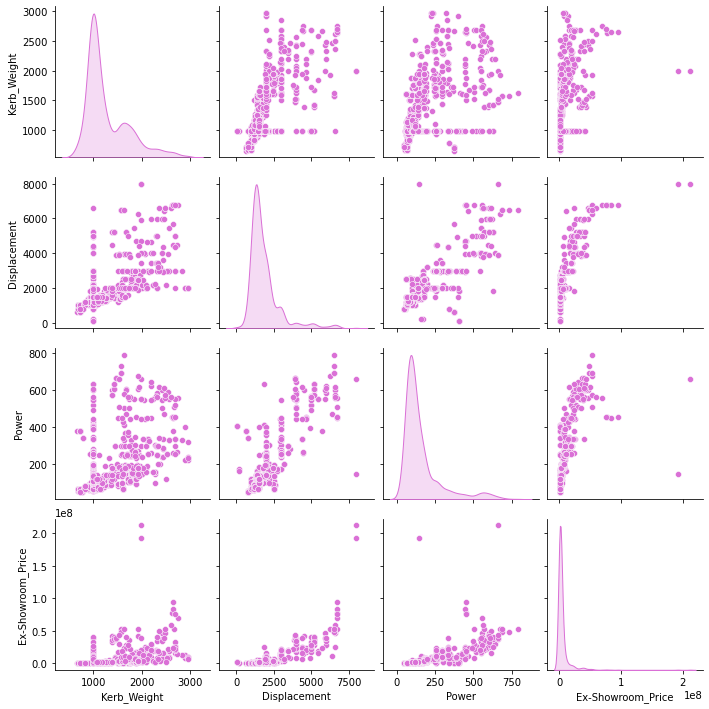

In [31]:
cols = ['Kerb_Weight','Displacement', 'Power','Ex-Showroom_Price']
filename = "Images/cars_disp_power_price_weight.png"
DrawPairPlot(automobile[cols], "scatter", "kde", filename)

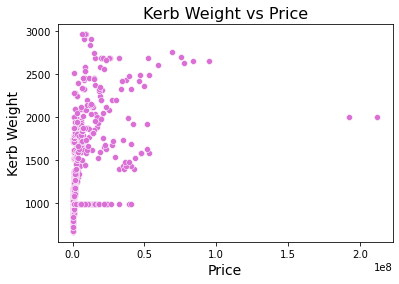

In [32]:
plot_title = "Kerb Weight vs Price"
xlabel = "Price"
yLabel = "Kerb Weight"
filename = "Images/cars_weight_price.png"

ax = DrawScatterPlot(automobile, "Ex-Showroom_Price", "Kerb_Weight", (6, 4), 
                     plot_color, plot_title, xlabel, yLabel, filename)

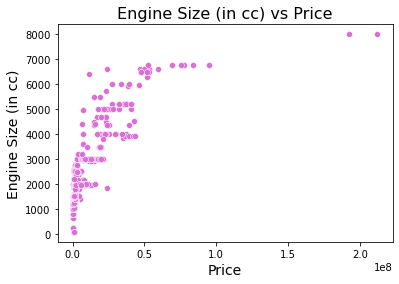

In [35]:
plot_title = "Engine Size (in cc) vs Price"
xlabel = "Price"
yLabel = "Engine Size (in cc)"
filename = "Images/disp_vs_price.png"

ax = DrawScatterPlot(automobile, "Ex-Showroom_Price", "Displacement", (6, 4), plot_color, 
                     plot_title, xlabel, yLabel, filename)

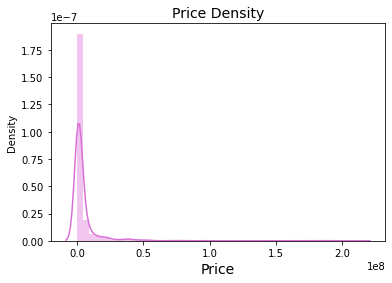

In [36]:
fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

price_dist = sns.distplot(automobile["Ex-Showroom_Price"], hist=True, color=plot_color, ax=ax);
ax.set_xlabel('Price',fontsize=14)
ax.set_title('Price Density', fontsize=14)

fig.savefig('Images/cars_dataset_price.png',dpi=fig.dpi,bbox_inches='tight')

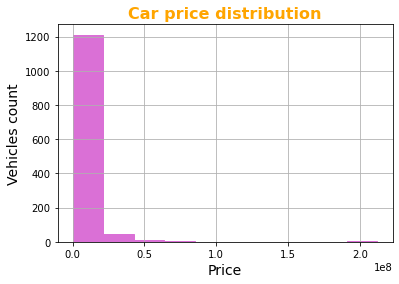

In [298]:
fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.1)

price_dist = automobile[['Ex-Showroom_Price']].hist(color=plot_color, ax=ax, edgecolor=plot_color, linewidth=1)

ax.set_title(label="Car Price distribution", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.set_ylabel('Vehicles count',fontsize=14 )
ax.set_xlabel('Price',fontsize=14)

plt.show()

fig.savefig('Images/cars_price_hist.png',dpi=fig.dpi,bbox_inches='tight')

<AxesSubplot:xlabel='Ex-Showroom_Price'>

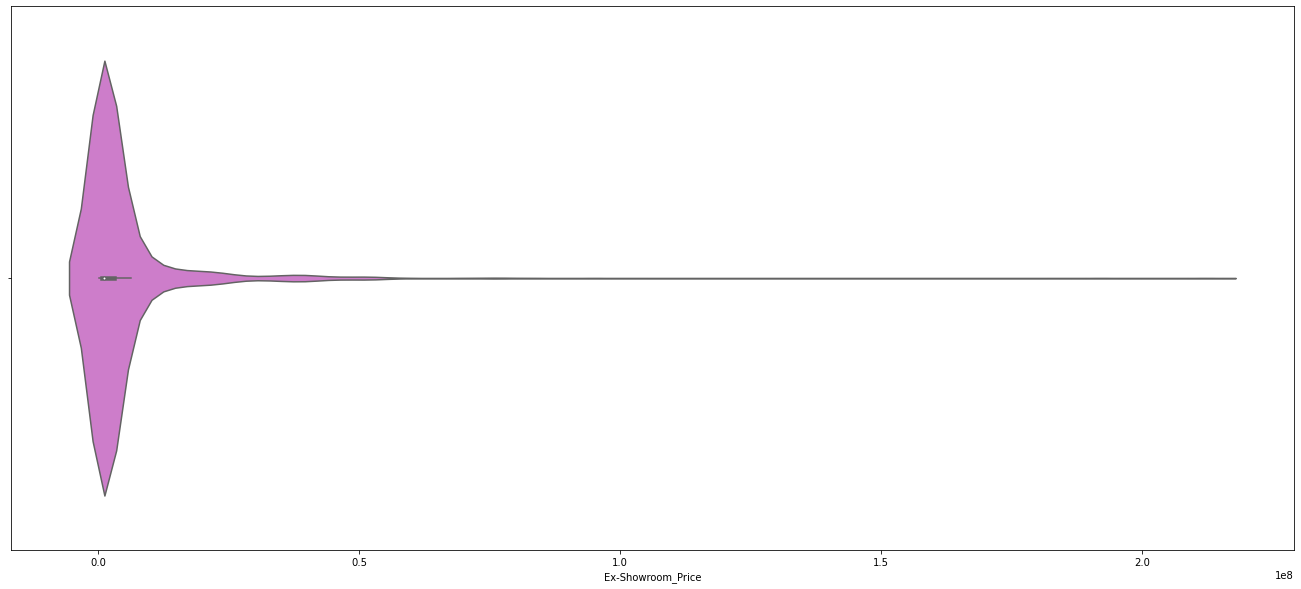

In [299]:
sns.violinplot(automobile['Ex-Showroom_Price'], color=plot_color)

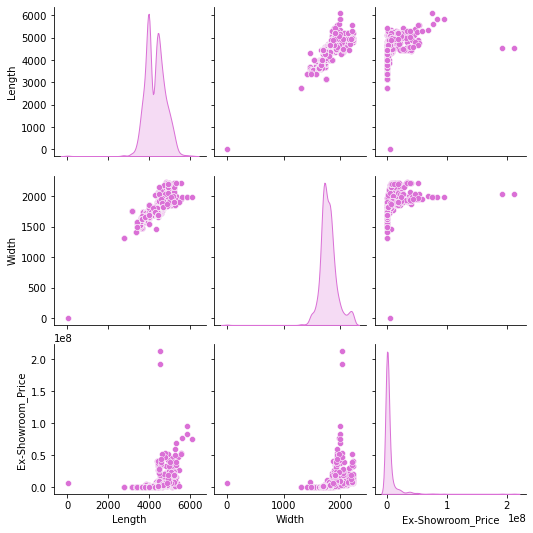

In [300]:
cols = ['Length','Width','Ex-Showroom_Price']
filename = "Images/automobile_dataset_bodysize_pairplot.png"
DrawPairPlot(automobile[cols], "scatter", "kde", filename)

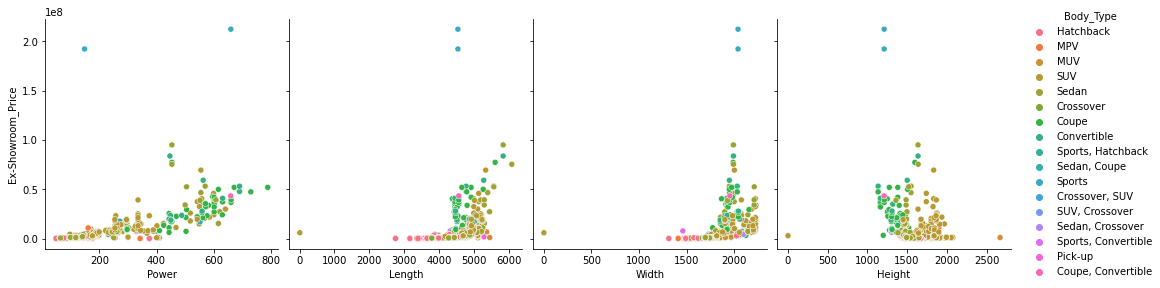

In [301]:
#fig, ax = plt.subplots(figsize=(14,10), ncols=1, nrows=1)

body_price_plot =  sns.pairplot(automobile, 
             size=4, aspect=0.9, 
             x_vars=['Power','Length','Width','Height'],
             y_vars=["Ex-Showroom_Price"], 
             kind='scatter',
             hue="Body_Type")

plt.savefig('Images/car_bodysize_power_price.png', dpi=fig.dpi,bbox_inches='tight')

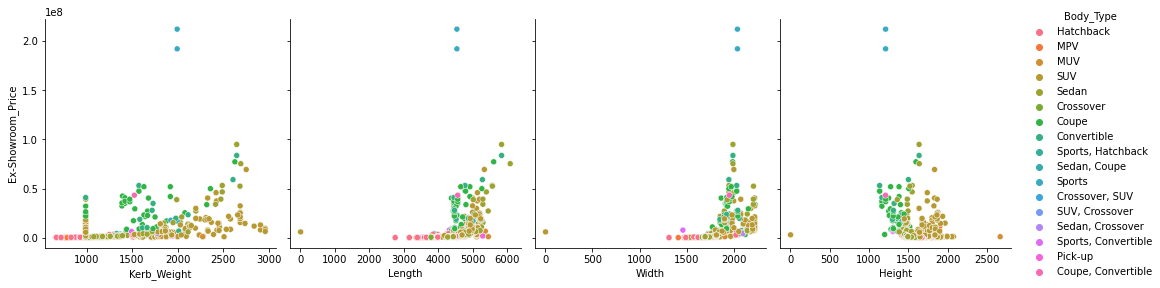

In [218]:
body_price_plot =  sns.pairplot(automobile, 
             size=4, aspect=0.9, 
             x_vars=['Kerb_Weight','Length','Width','Height'],
             y_vars=["Ex-Showroom_Price"], 
             kind='scatter',
             hue="Body_Type")

plt.savefig('Images/car_bodyweight_price_relation.png', dpi=fig.dpi,bbox_inches='tight')

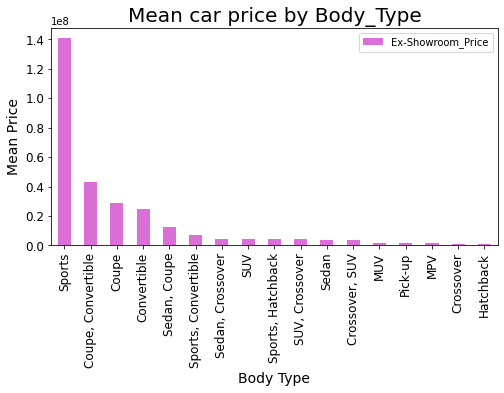

In [305]:
mean_car_prices = automobile.groupby(by="Body_Type")["Ex-Showroom_Price"].mean().sort_values(ascending=False).reset_index()

ax = mean_car_prices.plot.bar(
    x="Body_Type", 
    y="Ex-Showroom_Price",
    figsize=(8, 4),
    color=plot_color,
    fontsize=12
)

ax.set_title("Mean car price by Body_Type", fontsize=20)
ax.set_ylabel('Mean Price',fontsize=14 )
ax.set_xlabel('Body Type',fontsize=14)

plt.savefig('Images/mean_cars_price_by_body_type.png', bbox_inches='tight')

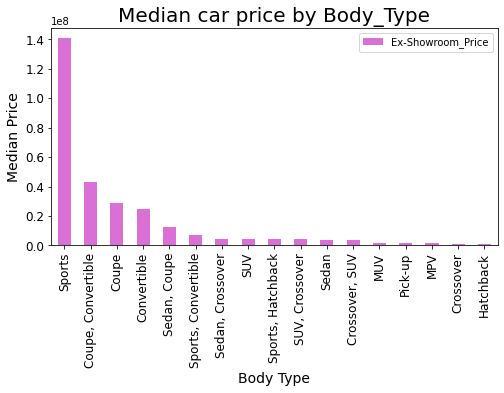

In [306]:
median_car_prices = automobile.groupby(by="Body_Type")["Ex-Showroom_Price"].median().sort_values(
    ascending=False).reset_index()

ax = mean_car_prices.plot.bar(x="Body_Type", y="Ex-Showroom_Price", figsize=(8, 4),
    color=plot_color, fontsize=12)

ax.set_title("Median car price by Body_Type", fontsize=20)
ax.set_ylabel('Median Price',fontsize=14 )
ax.set_xlabel('Body Type',fontsize=14)

plt.savefig('Images/median_cars_price_by_body_type.png', bbox_inches='tight')

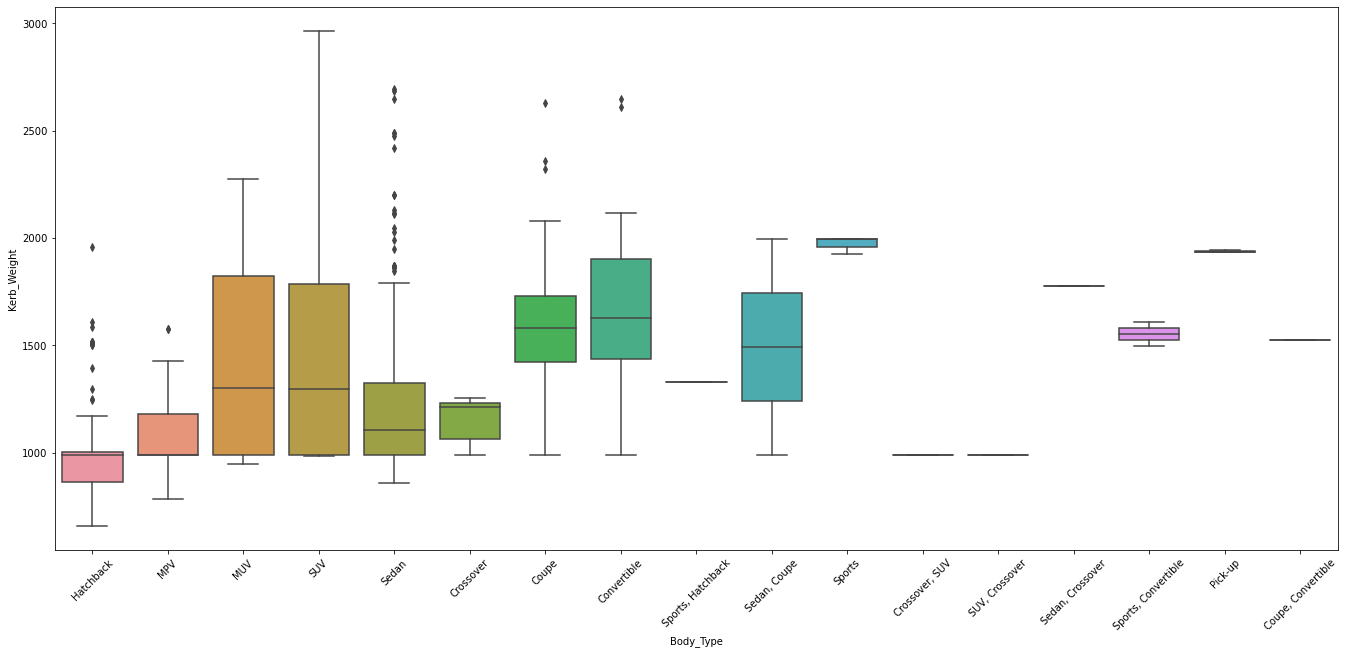

In [308]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="Body_Type", y="Kerb_Weight", data=automobile)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.savefig('Images/KerbWeight_by_bodytype.png', bbox_to_inches='tight')

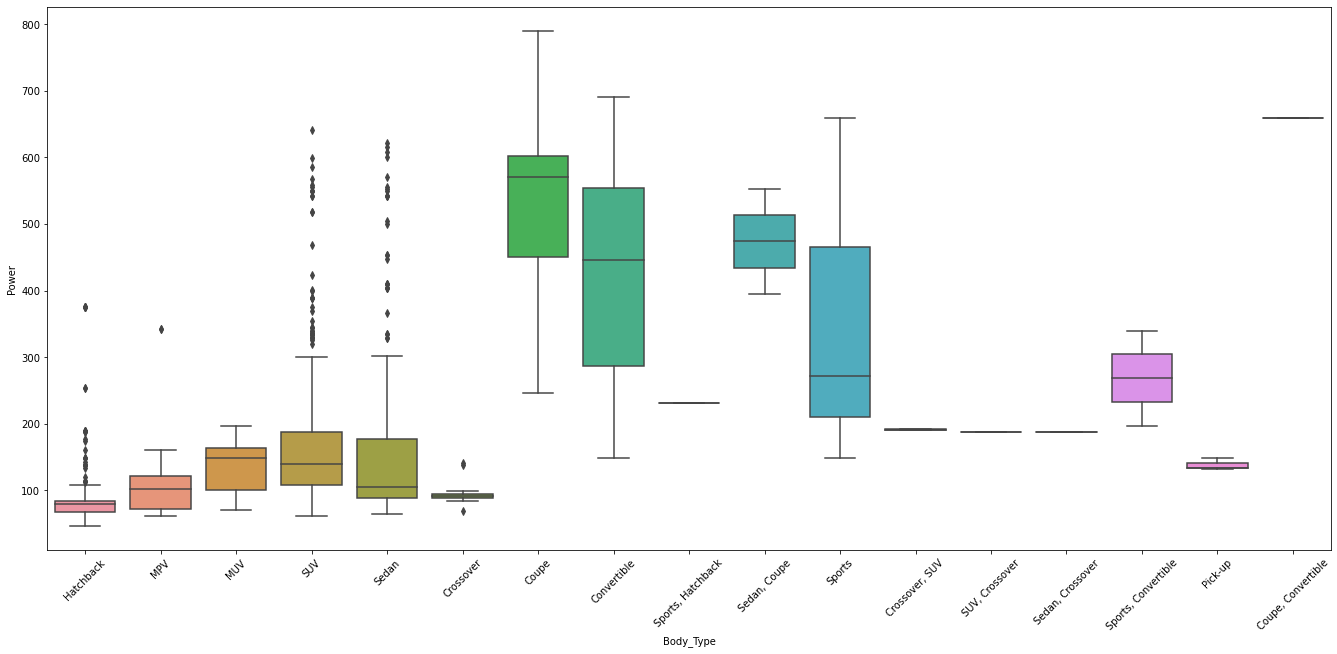

In [309]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="Body_Type", y="Power", data=automobile)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.savefig('Images/Power_by_bodytype.png', dpi=fig.dpi, bbox_inches='tight')

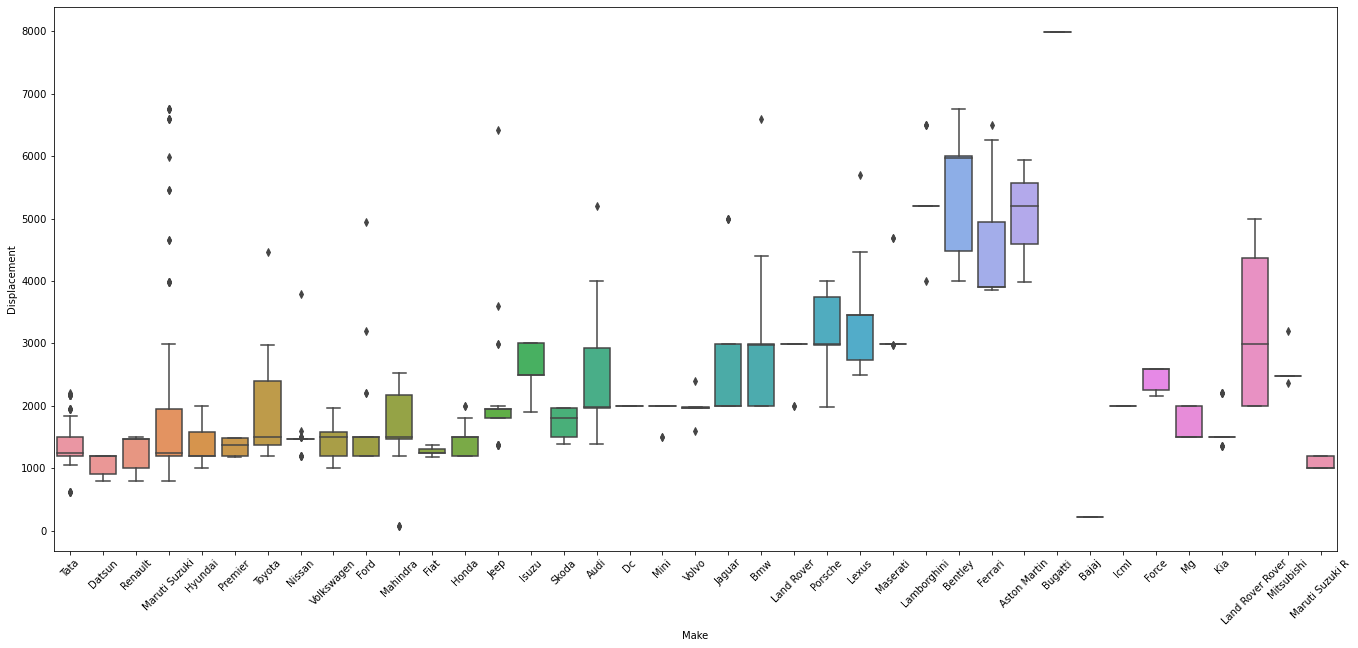

In [200]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="Make", y="Displacement", data=automobile)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.savefig('Images/Displacement_by_Make')

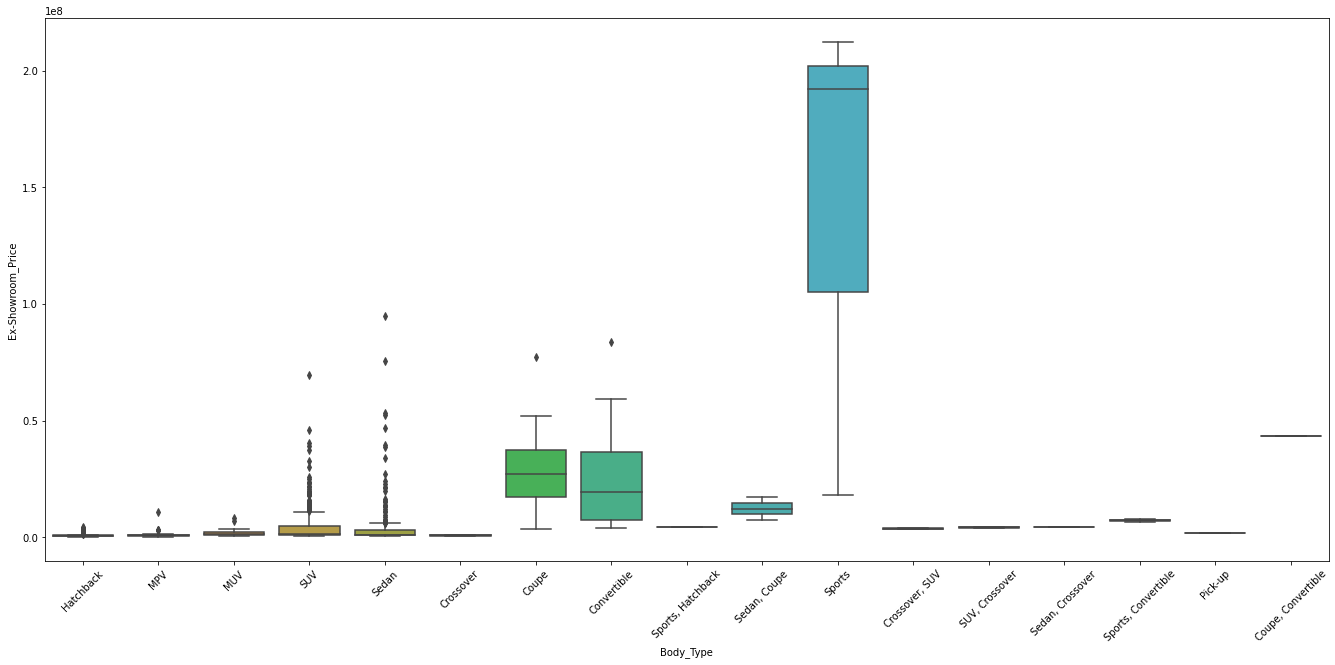

In [224]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="Body_Type", y="Ex-Showroom_Price", data=automobile)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

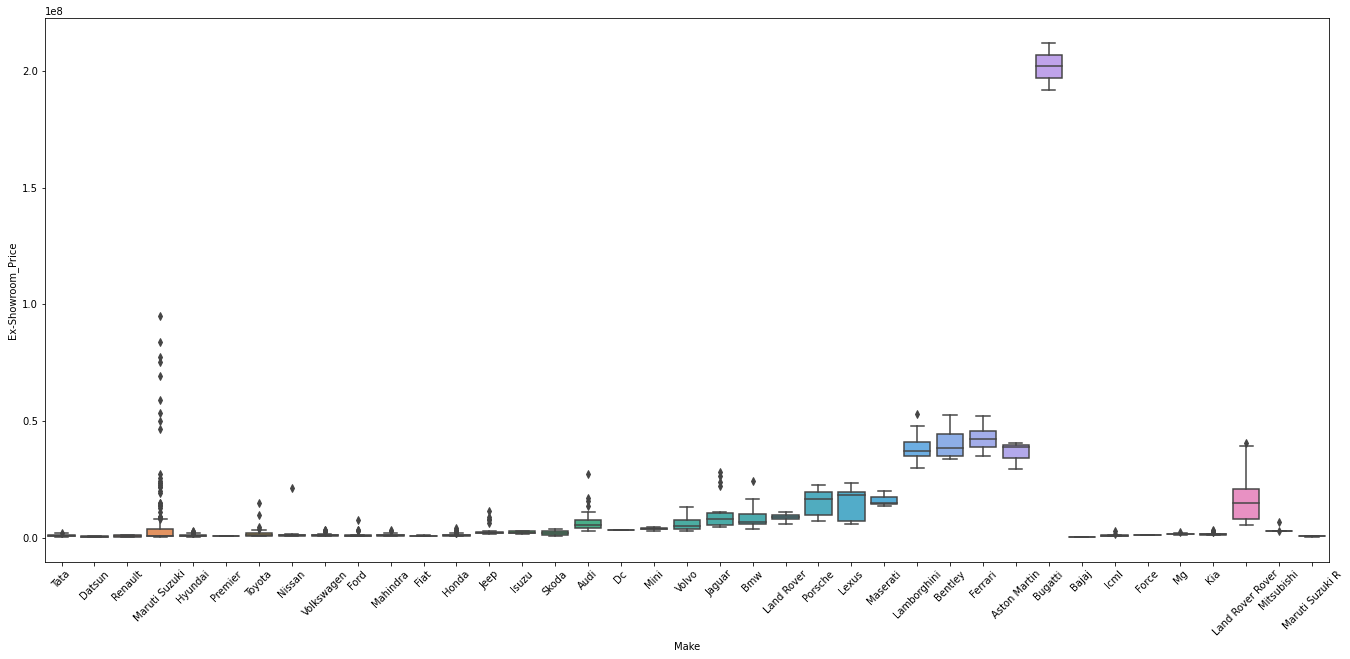

In [310]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="Make", y="Ex-Showroom_Price", data=automobile)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

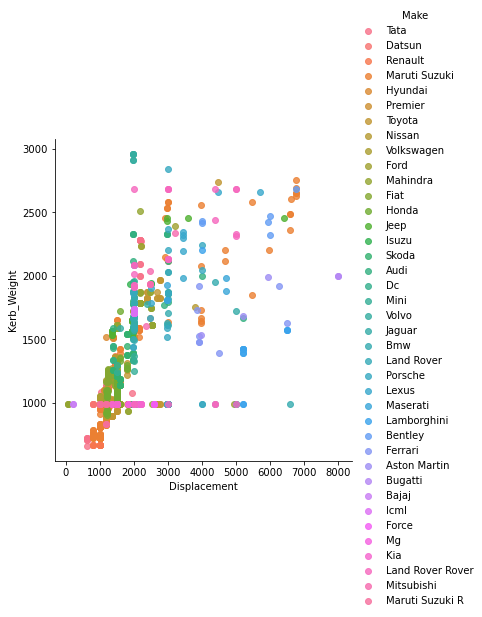

In [222]:
g = sns.lmplot("Displacement", "Kerb_Weight", automobile, hue= "Make",fit_reg=False)
g.savefig("Images/disp_kerbweight_by_make.png", bbox_to_inches='tight')

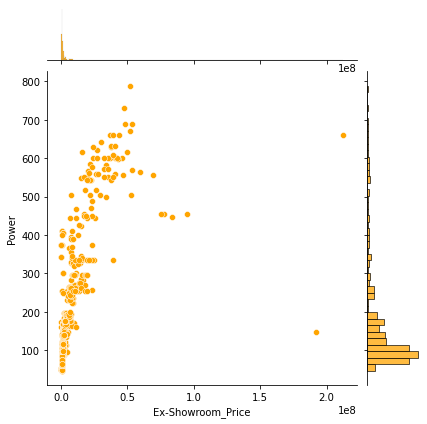

In [248]:
g2 = sns.jointplot(x = "Ex-Showroom_Price", y = "Power", color = 'orange',
              kind = "scatter", data = automobile)
g2.savefig("Images/price_power.png", bbox_to_inches='tight')

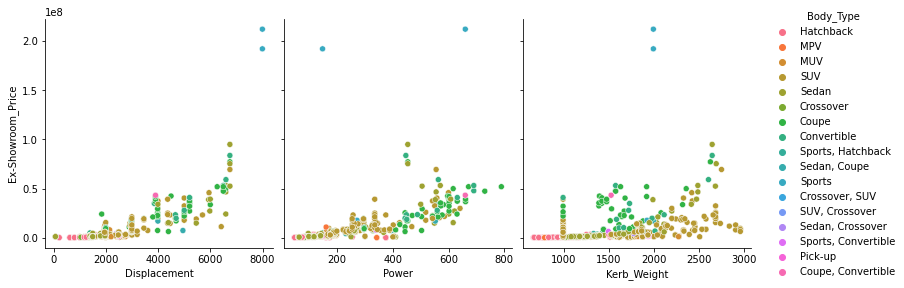

In [231]:
filename = 'Images/car_engine_specs_price.png'

body_price_plot =  sns.pairplot(automobile,
             size=4, aspect=0.9, 
             x_vars=['Displacement', 'Power', 'Kerb_Weight'],
             y_vars=["Ex-Showroom_Price"], 
             kind='scatter',
             hue="Body_Type")

plt.savefig(filename, bbox_inches='tight')

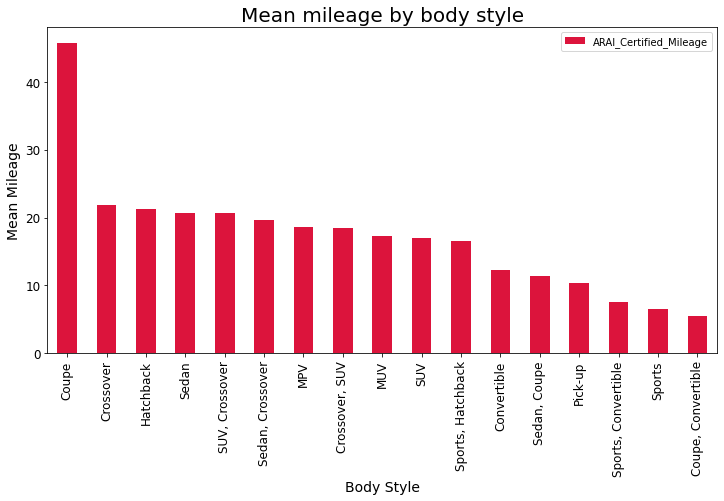

In [234]:
cars = automobile.groupby(by="Body_Type")["ARAI_Certified_Mileage"].mean().sort_values(ascending=False).reset_index()

ax = cars.plot.bar(
    x="Body_Type", 
    y="ARAI_Certified_Mileage",
    figsize=(12, 6),
    color=plot_color,
    fontsize=12
)

ax.set_title("Mean mileage by body style", fontsize=20)
ax.set_ylabel('Mean Mileage',fontsize=14 )
ax.set_xlabel('Body Style',fontsize=14)

plt.savefig('Images/mileage_by_bodytype.png', bbox_inches='tight')

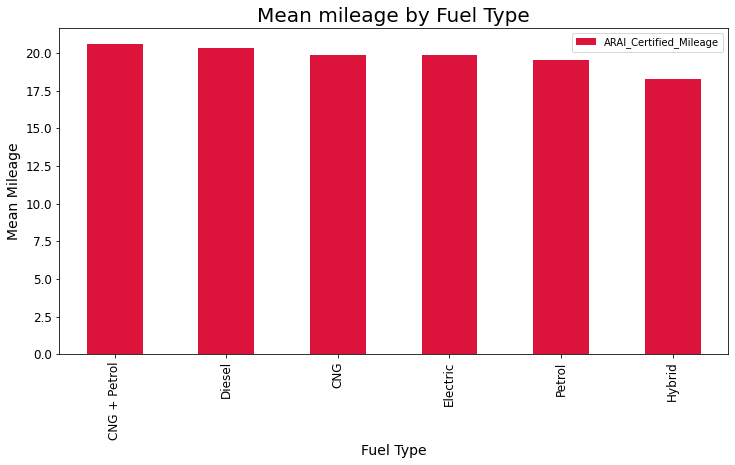

In [235]:
cars = automobile.groupby(by="Fuel_Type")["ARAI_Certified_Mileage"].mean().sort_values(ascending=False).reset_index()

ax = cars.plot.bar(
    x="Fuel_Type", 
    y="ARAI_Certified_Mileage",
    figsize=(12, 6),
    color=plot_color,
    fontsize=12
)

ax.set_title("Mean mileage by Fuel Type", fontsize=20)
ax.set_ylabel('Mean Mileage',fontsize=14 )
ax.set_xlabel('Fuel Type',fontsize=14)

plt.savefig('Images/mileage_by_fueltype.png', bbox_inches='tight')

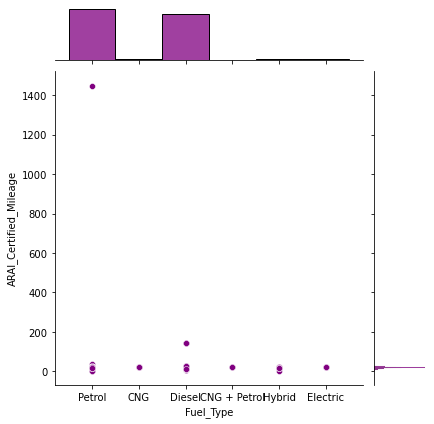

In [252]:
g3 = sns.jointplot(y = "ARAI_Certified_Mileage", x = "Fuel_Type", color = 'purple', 
              kind = "scatter", data = automobile)
g3.savefig("Images/mileage_fueltype.png", bbox_to_inches='tight')

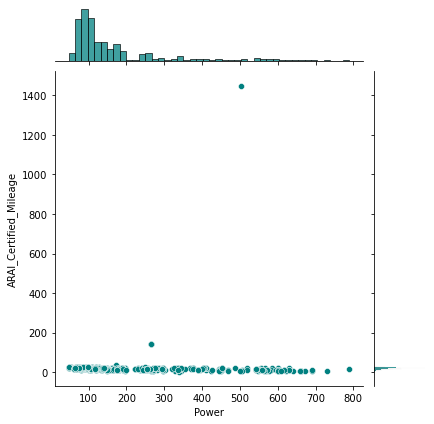

In [253]:
g3 = sns.jointplot(y = "ARAI_Certified_Mileage", x = "Power", color = 'teal', 
              kind = "scatter", data = automobile)
g3.savefig("Images/mileage_fueltype.png", bbox_to_inches='tight')

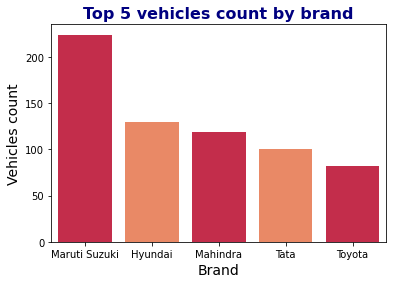

In [255]:
top_5_makers = automobile["Make"].value_counts()[:5].to_frame().reset_index()
maker_cols = top_5_makers["index"].tolist()

fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)

ax.set_title("Top 5 vehicles count by brand", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
col_dist = sns.countplot(data=automobile[automobile.Make.isin(maker_cols)], order=maker_cols, x="Make", ax=ax, 
                         palette=[plot_color, plot_alt_color])

col_dist.set_ylabel('Vehicles count', fontsize=14 )
col_dist.set_xlabel('Brand', fontsize=14)
fig.savefig('Images/topcars_by_brand.png',dpi=fig.dpi,bbox_inches='tight')

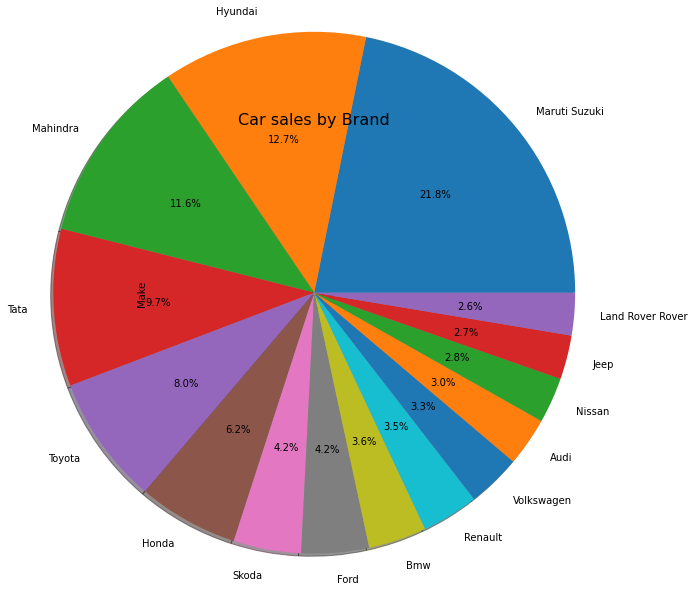

In [257]:
automobile["Make"].value_counts()[:15].plot(kind='pie', autopct='%1.1f%%', shadow=True, figsize=(6,6), radius=2)
plt.title('Car sales by Brand', fontsize=16)

plt.savefig('Images/cars_sales_by_brand.png', bbox_inches='tight')

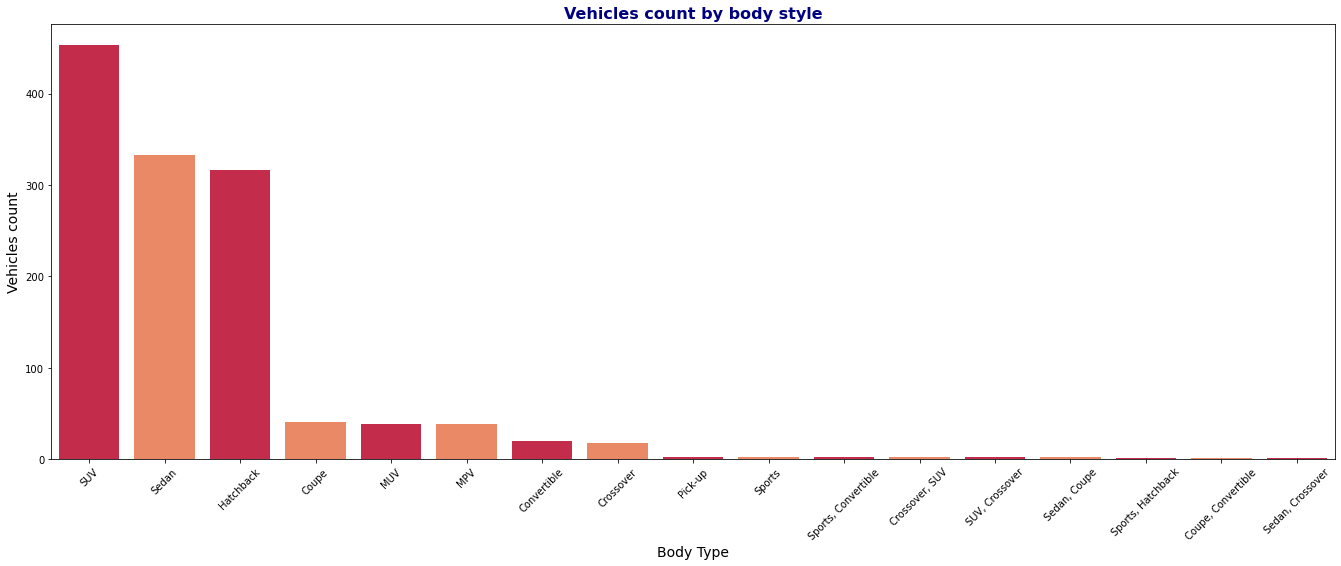

In [260]:
top_5_body_style = automobile["Body_Type"].value_counts().to_frame().reset_index()
maker_cols = top_5_body_style["index"].tolist()

fig, ax = plt.subplots(figsize=(23,8), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)

ax.set_title("Vehicles count by body style", y = y_title_margin, color=title_color, 
             fontsize=16, fontweight="bold")
col_dist = sns.countplot(data=automobile[automobile["Body_Type"].isin(maker_cols)], order=maker_cols, x="Body_Type", 
                         ax=ax, palette=[plot_color, plot_alt_color])

col_dist.set_ylabel('Vehicles count', fontsize=14 )
col_dist.set_xlabel('Body Type', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
fig.savefig('Images/topcars_by_bodytype.png',dpi=fig.dpi,bbox_inches='tight')

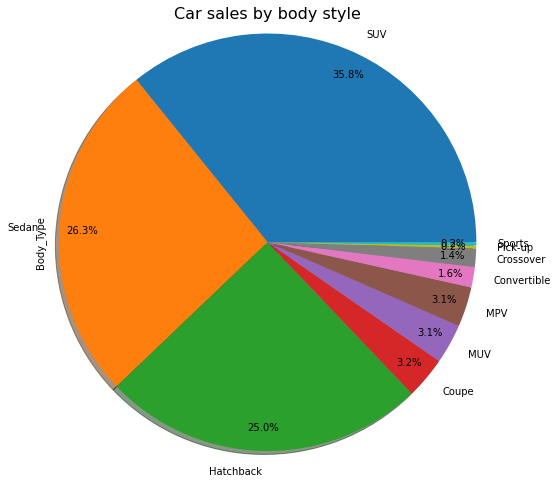

In [325]:
automobile["Body_Type"].value_counts()[:10].plot(kind='pie', autopct='%1.1f%%', shadow=True, pctdistance=0.89, radius=1.2,
                                                 figsize=(10,8))
plt.title('Car sales by body style', fontsize=16)

plt.savefig('Images/carssales_by_bodytype_pie.png', bbox_inches='tight')

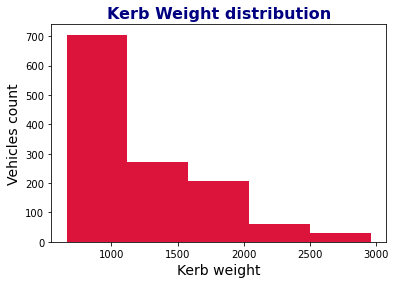

In [265]:
fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Kerb Weight distribution", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

symbol_dist = sns.distplot(automobile['Kerb_Weight'], bins=5, kde = False, ax=ax, 
                           hist_kws={"linewidth": 1, "alpha": 1, "color": plot_color})
symbol_dist.set_ylabel('Vehicles count',fontsize=14 )
symbol_dist.set_xlabel('Kerb weight',fontsize=14)

fig.savefig('Images/kerb_weight_dist.png',dpi=fig.dpi,bbox_inches='tight')

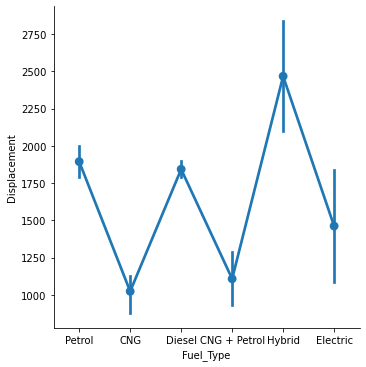

In [268]:
sns.factorplot(data=automobile, x="Fuel_Type", y="Displacement")